## Pytorch regression _2.2_ [slump_test.data]
Work on diagnostic systems.
There is no progress in tank construction without diagnostics.
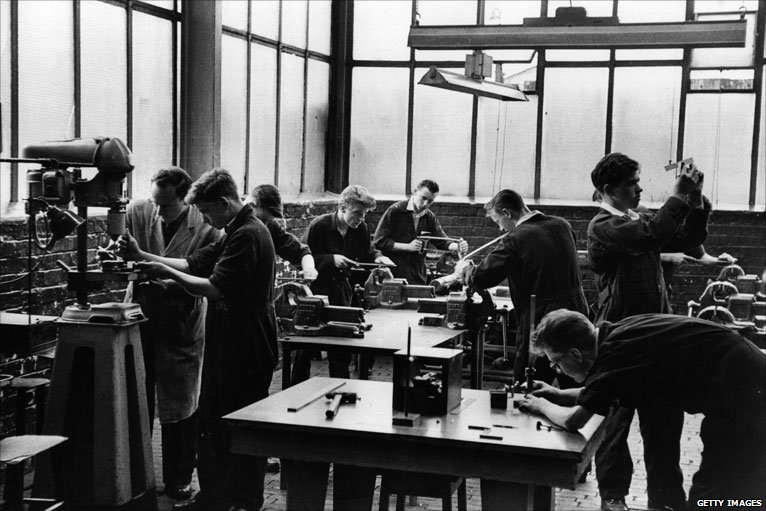

https://github.com/jcjohnson/pytorch-examples#pytorch-custom-nn-modules

In [1]:
import torch

I'm starting a GPU graphics card (which I don't have)

<span style="color:green"> Odpalam karte graficzną GPU (której nie mam)

In [2]:
device = torch.device('cpu') # obliczenia robie na CPU
#device = torch.device('cuda') # obliczenia robie na GPU

### Output variables (3):
 - SLUMP (cm)
 - FLOW (cm)
 - 28-day Compressive Strength (Mpa)

In [3]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/4/slump_test.data')
df.head(3)

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81


I fill all holes with values out of range

<span style="color:green"> Wypełniam wszystkie dziury wartościami z poza zakresu

In [4]:
del df['No']


In [5]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df = df.dropna(how='any') # jednak je kasuje te dziury

# df.fillna(-777, inplace=True)
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [7]:
print(df.dtypes)
df.head(3)

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81


### to_datetime

### Encodes text values

### <span style="color:green"> Koduje wartości tekstowe

In [8]:
import numpy as np

a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------


In [9]:
df.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

In [10]:
df.columns = ['Cement', 'Slag', 'Fly_ash', 'Water', 'SP', 'Coarse_Aggr',
       'Fine_Aggr', 'SLUMP', 'FLOW','Compressive_Strength']

### I specify what is X and what is y

### <span style="color:green"> Określam co jest X a co y

In [11]:
X = df.drop(['SLUMP', 'FLOW','Compressive_Strength'],1)
y = df[['SLUMP', 'FLOW','Compressive_Strength']]

### Scaling (normalization) of the X value

X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

### <span style="color:green"> Skalowanie (normalizacja) wartości X

<span style="color:green"> X nigdy nie powinien być zbyt duży. Idealnie powinien być w zakresie [-1, 1]. Jeśli tak nie jest, należy znormalizować dane wejściowe.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X.std(), decimals=2), np.round(X.mean(), decimals=2))

1.0 -0.0


In [13]:
y.head(3)

,SLUMP,FLOW,Compressive_Strength
0,23.0,62.0,34.99
1,0.0,20.0,41.14
2,1.0,20.0,41.81


In [14]:
y = (y / 100)  # max test score is 100
#print(y.head(3))
print(np.round(y.std(), decimals=2), np.round(y.mean(), decimals=2))

SLUMP                   0.09
FLOW                    0.18
Compressive_Strength    0.08
dtype: float64 SLUMP                   0.18
FLOW                    0.50
Compressive_Strength    0.36
dtype: float64


### Creates random input and output

### <span style="color:green"> Tworzy losowe dane wejściowe i wyjściowe 

In [15]:
import numpy as np

#X = X.values       #- jak była normalizacja to to nie działa
X = torch.tensor(X)
print(X[:3])

tensor([[ 0.5492,  0.0669, -0.5178,  0.6381,  0.1647,  0.2276, -0.9456],
        [-0.8522,  1.1805,  0.4939, -0.8537,  1.2385, -0.4659,  0.1015],
        [-0.8650,  1.1639,  0.4939, -0.9034,  2.6702, -0.5000,  0.0539]],
       dtype=torch.float64)


In [16]:
X = X.type(torch.FloatTensor)
print(X[:3])

tensor([[ 0.5492,  0.0669, -0.5178,  0.6381,  0.1647,  0.2276, -0.9456],
        [-0.8522,  1.1805,  0.4939, -0.8537,  1.2385, -0.4659,  0.1015],
        [-0.8650,  1.1639,  0.4939, -0.9034,  2.6702, -0.5000,  0.0539]])


In [17]:
y = y.values   # tworzymy macierz numpy - jak była normalizacja to to nie działa

In [18]:
y = torch.tensor(y)
print(y[:3])

tensor([[0.2300, 0.6200, 0.3499],
        [0.0000, 0.2000, 0.4114],
        [0.0100, 0.2000, 0.4181]], dtype=torch.float64)


### TRanspends the resulting vector to become a column
### <span style="color:green"> TRansponuje wektor wynikowy aby stał się kolumną</span>

In [19]:
y = y.type(torch.FloatTensor)

In [20]:
print('X:',X.shape)
print('y:',y.shape)

X: torch.Size([103, 7])
y: torch.Size([103, 3])


In [21]:
a,b = X.shape
a

103

In [22]:
a,b = X.shape
a

total_records = a
test_records = int(a * .2)

X_train = X[:total_records-test_records]
X_test = X[total_records-test_records:total_records]

y_train = y[:total_records-test_records]
y_test = y[total_records-test_records:total_records]

In [23]:
print('X_train: ',X_train.shape)
print('X_test:  ',X_test.shape)
print('----------------------------------------------------')
print('y_train: ',y_train.shape)
print('y_test:  ',y_test.shape)

X_train:  torch.Size([83, 7])
X_test:   torch.Size([20, 7])
----------------------------------------------------
y_train:  torch.Size([83, 3])
y_test:   torch.Size([20, 3])


### Model

In [24]:
N, D_in = X_train.shape
N, D_out = y_train.shape

H = 100
device = torch.device('cpu')

In [25]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        ).to(device)


### MSE loss function
### <span style="color:green"> Funkcja straty MSE

In [26]:
loss_fn = torch.nn.MSELoss(reduction='sum')

### Define of learning

### <span style="color:green"> Definiowanie nauki

In [27]:
y_pred = model(X_train)
y_pred[:5]

tensor([[ 0.0210, -0.2440,  0.0896],
        [-0.1337, -0.0031, -0.1322],
        [-0.0948,  0.0764, -0.0926],
        [-0.0646,  0.1255, -0.0388],
        [-0.0609, -0.2360,  0.2599]], grad_fn=<SliceBackward>)

In [28]:
learning_rate = 0.00005
epochs = 5500
aggregated_losses = []

for t in range(epochs):
  
   y_pred = model(X_train)
            
 
   loss = loss_fn(y_pred, y_train) # <=# Obliczenie i wydruku straty. Mijamy Tensory zawierające przewidywane i prawdziwe
   print(t, loss.item())     # <=# wartości y, a funkcja straty zwraca Tensor zawierający stratę.
   aggregated_losses.append(loss) ## potrzebne do wykresu    
  
   model.zero_grad()    #<= # Zeruj gradienty przed uruchomieniem przejścia do tyłu. 
   

   loss.backward()      #<== Przełożenie wsteczne: oblicz gradient gradientu w odniesieniu do wszystkich możliwych do nauczenia się
                                 # parametrów modelu. Wewnętrznie parametry każdego modułu są przechowywane
                                 # w Tensorach z requires_grad=True, więc to wywołanie obliczy gradienty
                                 # wszystkich możliwych do nauczenia parametrów w modelu.
  
   with torch.no_grad():              #<== Zaktualizuj ciężary za pomocą opadania gradientu. Każdy parametr jest tensorem, więc
     for param in model.parameters():         # możemy uzyskać dostęp do jego danych i gradientów tak jak wcześniej.
       param.data -= learning_rate * param.grad

0 51.605430603027344
1 46.501373291015625
2 42.090457916259766
3 38.273094177246094
4 34.96441650390625
5 32.091835021972656
6 29.593259811401367
7 27.415672302246094
8 25.513748168945312
9 23.848716735839844
10 22.387447357177734
11 21.101530075073242
12 19.966611862182617
13 18.96187400817871
14 18.069517135620117
15 17.27430534362793
16 16.563169479370117
17 15.924871444702148
18 15.34980297088623
19 14.82966136932373
20 14.35737133026123
21 13.926834106445312
22 13.532808303833008
23 13.17080020904541
24 12.8369140625
25 12.527812957763672
26 12.240618705749512
27 11.972832679748535
28 11.72230052947998
29 11.487163543701172
30 11.265811920166016
31 11.056845664978027
32 10.859039306640625
33 10.671341896057129
34 10.49282169342041
35 10.322667121887207
36 10.160172462463379
37 10.004706382751465
38 9.85572338104248
39 9.71273422241211
40 9.575309753417969
41 9.44306468963623
42 9.315653800964355
43 9.192777633666992
44 9.074155807495117
45 8.959542274475098
46 8.848711967468262
47

### There are many potential reasons. Most likely exploding gradients. The two things to try first:

- Normalize the inputs
- Lower the learning rate




### <span style="color:green">Istnieje wiele potencjalnych przyczyn. Najprawdopodobniej wybuchające gradienty. Dwie rzeczy do wypróbowania w pierwszej kolejności:

 - <span style="color:green">- Normalizuj wejścia
 - <span style="color:green">- Obniż tempo uczenia msię

<function matplotlib.pyplot.show(*args, **kw)>

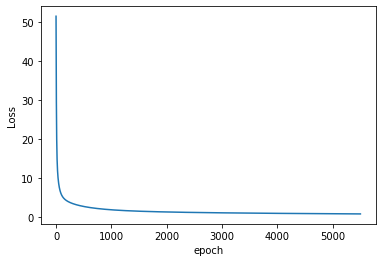

In [29]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.show

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

### <span style="color:green"> Prognoza na podstawie modelu
- <span style="color:green"> podstawiamy te same równania, które były w modelu 
- <span style="color:green"> Poniższy wynik loss pokazuje ostatnią sekwencje modelu
- <span style="color:green"> Loss pokazuuje ile myli się model (loss = suma kwadratu błedów) po ostatniej sekwencji uczenia się 
    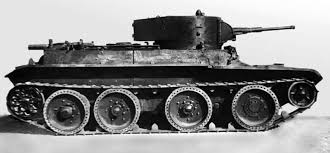

In [30]:
with torch.no_grad():
    y_pred = model(X_test)  
    loss = (y_pred - y_test).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.78319556


<span style="color:green">Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierać 1 neuron, każda prognoza będzie zawierać 1 wartości. Przykładowo pierwsze 5 przewidywanych wartości wygląda następująco:

In [31]:
y_pred[:5]

tensor([[0.1167, 0.2585, 0.3457],
        [0.1689, 0.3179, 0.3564],
        [0.1555, 0.4209, 0.3169],
        [0.1640, 0.5558, 0.3096],
        [0.2009, 0.6377, 0.3983]])

### We save the whole model

### <span style="color:green"> Zapisujemy cały model

In [32]:
torch.save(model,'/home/wojciech/Pulpit/7/byk15.pb')

### We play the whole model
### <span style="color:green"> Odtwarzamy cały model

In [33]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk15.pb')
KOT.eval()

Sequential(
  (0): Linear(in_features=7, out_features=100, bias=True)
  (1): ReLU()
  (2): ReLU()
  (3): Linear(in_features=100, out_features=3, bias=True)
)

### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

### <span style="color:green">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="color:green"> Wybieramy sobie jakąś losowy rekord z tensora

### r2_score_compute
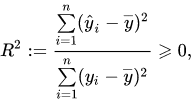

In [34]:
def r2_score_compute_fn(y_pred, y_test):
    e = torch.sum((y_pred-y_test.mean()) ** 2) / torch.sum((y_test - y_test.mean()) ** 2)
    return 1 - e.item()

In [35]:
r2_score_compute_fn(y_test, y_pred)

-0.7112149000167847

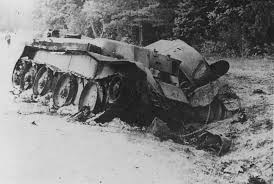

In [36]:
y_pred = y_pred*100
foka = y_pred.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.head(2)

,0,1,2
0,11.672218,25.851948,34.566082
1,16.887938,31.786806,35.640099


In [37]:
df11.columns = ['FOR__SLUMP', 'FOR__FLOW','FOR__Compressive_Strength']

In [38]:
y_test = y_test*100
foka = y_test.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.head(2)

,0,1,2
0,21.25,46.000000,36.320000
1,23.50,52.499996,33.779999


In [39]:
df_t.columns = ['SLUMP', 'FLOW','Compressive_Strength']

In [40]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.head(3)

,SLUMP,FLOW,Compressive_Strength,FOR__SLUMP,FOR__FLOW,FOR__Compressive_Strength
0,21.25,46.000000,36.320000,11.672218,25.851948,34.566082
1,23.50,52.499996,33.779999,16.887938,31.786806,35.640099
2,24.50,60.000004,30.970001,15.550632,42.093254,31.693914


In [41]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

<function matplotlib.pyplot.show(*args, **kw)>

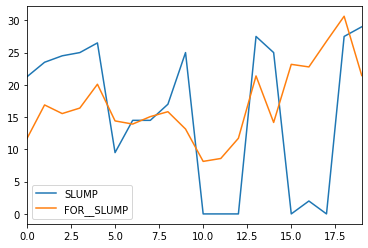

In [42]:
NOWA[['SLUMP','FOR__SLUMP']].plot()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 72x432 with 0 Axes>

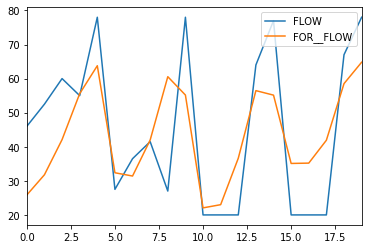

In [43]:
plt.figure(figsize=(1,6))
NOWA[['FLOW','FOR__FLOW']].plot()
plt.show

## r2_score

In [62]:
y = NOWA['FLOW']
y_perd = NOWA['FOR__FLOW']
SS_Residual = sum((y-y_perd)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r2_score:           %0.3f' % r_squared)
print('adjusted_r_squared: %0.3f' % adjusted_r_squared)

r2_score:           0.492
adjusted_r_squared: 0.196


In [57]:
from sklearn.metrics import r2_score
print('r2_score: %0.3f' %  r2_score(y, y_perd))

r2_score: 0.492


In [180]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_perd)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(NOWA['FLOW']-NOWA['FOR__FLOW']))/NOWA['FLOW']
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0:suma reszt modelu wynosi zero--')
        print('OK! Resztki modelu nie różnią się od zera - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue0) 
    else:     
        print('Źle - Resztki modelu RÓŻNIĄ SIĘ OD ZERA - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y maj rozkład normalny?--------------------------------')
        print('OK Shapiro-Wilk! y maja rozkład normalny - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue2_1) 
    else:     
        print('Źle Shapiro-Wilk - y NIE MA ROZKŁADU NORMALNEGO - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred maj rozkład normalny?--')
        print('OK Shapiro-Wilk! y_pred ma rozkład normalny - pvalue: %0.4f > 0.01 (NIE odrzucamy h0)'% pvalue2_2) 
    else:     
        print('Źle Shapiro-Wilk y_pred NIE MA ROZKŁADU NORMALNEGO - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
    
    

    stat,pvalue3 = stats.kruskal(NOWA['FOR__FLOW'],NOWA['FLOW'])
    stat,pvalue4 = stats.f_oneway(NOWA['FOR__FLOW'],NOWA['FLOW'])

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Shapiro-Wilk: Zmienne nie mają rozkładu normalnego! Nie można zrobić analizy ANOVA')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: czy prognoza i obserwacje empir. mają równe średnie?')
            print('OK! Kruskal-Wallis H0: prognoza i obserwacje empir. mają równe średnie - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue3) 
        else:     
            print('Źle - Kruskal-Wallis: prognoza i obserwacje empir. NIE MAJĄ równych średnich - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue3)  

    
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): czy prognoza i obserwacje empir. mają równe średnie?--------------------------------')
            print('OK! prognoza i obserwacje empir. mają równe średnie - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue4) 
        else:     
            print('Źle - prognoza i obserwacje empir. NIE MAJĄ równych średnich - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

-----two methods--------------
r2_score:           0.492
r2_score:           0.492

-------------------------------
Mean absolute error     MAE:  13.27 
Root mean squared error RMSE: 15.91 
Mean absolute error     MAPE: 37.90 
-------------------------------
t-test H0:suma reszt modelu wynosi zero--
OK! Resztki modelu nie różnią się od zera - pvalue: 0.6007 > 0.01 (NIE odrzucamy H0)
--------------------------------------------------------------------------------------------
Źle Shapiro-Wilk - y NIE MA ROZKŁADU NORMALNEGO - pvalue: 0.0080 < 0.01 (Odrzucamy H0)
--------------------------------------------------------------------------------------------
OK Shapiro-Wilk! y_pred ma rozkład normalny - pvalue: 0.1010 > 0.01 (NIE odrzucamy h0)


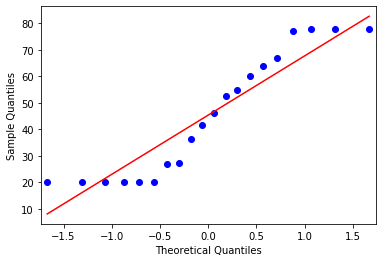

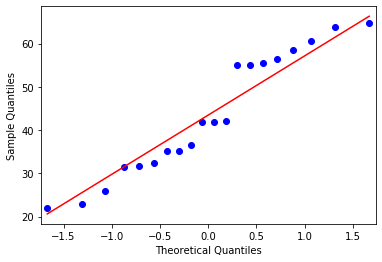

--------------------------------------------------------------------------------------------
Shapiro-Wilk: Zmienne nie mają rozkładu normalnego! Nie można zrobić analizy ANOVA
Kruskal-Wallis NON-PARAMETRIC TEST: czy prognoza i obserwacje empir. mają równe średnie?
OK! Kruskal-Wallis H0: prognoza i obserwacje empir. mają równe średnie - pvalue: 0.8922 > 0.01 (NIE odrzucamy H0)
--------------------------------------------------------------------------------------------


In [181]:
y = NOWA['FLOW']
y_pred = NOWA['FOR__FLOW']

Regression_Assessment(y, y_pred)

## Mean absolute error MAE
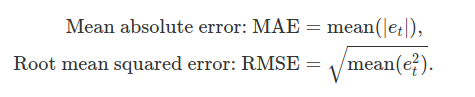

In [ ]:
MAE = (abs(NOWA['FLOW']-NOWA['FOR__FLOW'])).mean()
print('Mean absolute error MAE: %0.2f ' %  MAE)

## Root mean squared error RMSE

In [ ]:
RMSE = np.sqrt(((NOWA['FLOW']-NOWA['FOR__FLOW'])**2).mean())
print('Root mean squared error RMSE: %0.2f ' %  RMSE)

## Percentage errors MAPE



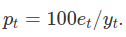

In [ ]:
pt = (100*(NOWA['FLOW']-NOWA['FOR__FLOW']))/NOWA['FLOW']
MAPE = (abs(pt)).mean()

print('Mean absolute error MAPE: %0.2f ' %  MAPE)


## Jak zmierzyć dobroć modelu regresji
https://towardsdatascience.com/how-to-measure-the-goodness-of-a-regression-model-60c7f87614ce

### <span style="color:blue"> t-test
Sprawdzamy, czy reszty są stronnicze (biased).Ze statystyk elementarnej wiemy, że średnia wartość reszt powinna wynosić zero. Można to sprawdzic za pomocą testu t-Studenta.

In [ ]:
NOWA['SLUMP DIFF'] = NOWA['SLUMP']-NOWA['FOR__SLUMP']

In [ ]:
NOWA['SLUMP DIFF']

Jest to dwustronny test hipotezy zerowej, że oczekiwana wartość (średnia) próbki niezależnych obserwacji a jest równa podanej średniej populacji, popmean . Sprawdzamy czy śrenidna resztek modelu różni sie od 0.

In [ ]:
import scipy.stats as stats
stat,pvalue0 = stats.ttest_1samp(a=NOWA['SLUMP DIFF'],popmean=0.0)

if pvalue0 > 0.01:
    print('t-test:średnia wartość reszt powinna wynosić zero--pvalue: %0.4f' % pvalue0)
    print('OK! Resztki modelu nie różnią się od zera - pvalue > 0.01 (NIE odrzucamy hipotezy zerowej)') 
else:     
    print('Źle - Resztki modelu RÓŻNIĄ SIĘ OD ZERA - pvalue < 0.01 (Odrzucamy hipotezę zerową)')  
print('--------------------------------------------------------------------------------------------')

### <span style="color:blue"> Welch’s t-test
    
<span style="color:red">    To robimy dla wartości testowej i treningowej!!     
    
Podstawia się tu reszty z danych treningowych i danych testowych i porównuje się czy maja taki sam rozkład. Ja porównałem wartości teoretyczne i wartości empiryczne.

In [ ]:
import scipy.stats as stats
stat,pvalue1 = stats.ttest_rel(NOWA['FOR__FLOW'],NOWA['FLOW'])

if pvalue1 > 0.01:
    print('t-test:średnia wartość reszt powinna wynosić zero--pvalue: %0.4f' % pvalue1)
    print('OK! Resztki modelu nie różnią się od zera - pvalue > 0.01 (NIE odrzucamy hipotezy zerowej)') 
else:     
    print('Źle - Resztki modelu RÓŻNIĄ SIĘ OD ZERA - pvalue < 0.01 (Odrzucamy hipotezę zerową)')  
print('--------------------------------------------------------------------------------------------')

### <span style="color:blue"> Shapiro-Wilk test
<span style="color:red">    To robimy dla wartości testowej i treningowej!! 
    
Sprawdzamy czy resztki modelu mają rozkład normalny. Test Shapiro-Wilka testuje hipotezę zerową, że dane pochodzą z rozkładu normalnego. To robimy dla wartości testowej i treningowej!!     

    
    

In [ ]:
import scipy.stats as stats
stat,pvalue2_1 = stats.shapiro(NOWA['FOR__FLOW'])
stat,pvalue2_2 = stats.shapiro(NOWA['FLOW'])

if pvalue2_1 > 0.01:
    print('Shapiro-Wilk: czy resztki modelu mają rozkład normalny?--------------------------------')
    print('OK! resztki modelu dla X_train mają rozkład normalny - pvalue: %0.4f > 0.01 (NIE odrzucamy hipotezy zerowej)'% pvalue2_1) 
else:     
    print('Źle - Resztki modelu dla X_trainNIE MAJĄ ROZKŁADU NORMALNEGO - pvalue: %0.4f < 0.01 (Odrzucamy hipotezę zerową)'% pvalue2_1)  
print('--------------------------------------------------------------------------------------------')
if pvalue2_2 > 0.01:
    print('Shapiro-Wilk: czy resztki modelu dla X_test mają rozkład normalny?--pvalue: %0.4f' % pvalue2_2)
    print('OK! resztki modelu dla X_test mają rozkład normalny - pvalue: %0.4f > 0.01 (NIE odrzucamy hipotezy zerowej %)') 
else:     
    print('Źle - Resztki modelu dla X_test NIE MAJĄ ROZKŁADU NORMALNEGO - pvalue: %0.4f < 0.01 (Odrzucamy hipotezę zerową)'% pvalue2_2)  
print('--------------------------------------------------------------------------------------------')

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(NOWA['FOR__FLOW'], line='s')
pyplot.show()

qqplot(NOWA['FLOW'], line='s')
pyplot.show()

### <span style="color:blue"> F-test (ANOVA)
Anova sprawdza, czy ŚREDNIA między grupami. Porównania wariancji za pomocą rozkładu F.

In [ ]:
import scipy.stats as stats

stat,pvalue3 = stats.kruskal(NOWA['FOR__FLOW'],NOWA['FLOW'])
stat,pvalue4 = stats.f_oneway(NOWA['FOR__FLOW'],NOWA['FLOW'])

if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
    print('Shapiro-Wilk: Zmienne nie mają rozkładu normalnego! Nie można zrobić analizy ANOVA')
     
    if pvalue3 > 0.01:
        print('Kruskal-Wallis NON-PARAMETRIC TEST: czy prognoza i obserwacje empir. mają równe średnie?')
        print('OK! Kruskal-Wallis: prognoza i obserwacje empir. mają równe średnie - pvalue: %0.4f > 0.01 (NIE odrzucamy hipotezy zerowej)'% pvalue3) 
    else:     
        print('Źle - Kruskal-Wallis: prognoza i obserwacje empir. NIE MAJĄ równych średnich - pvalue: %0.4f < 0.01 (Odrzucamy hipotezę zerową)'% pvalue3)  

    
    
else:

    if pvalue4 > 0.01:
        print('F-test (ANOVA): czy prognoza i obserwacje empir. mają równe średnie?--------------------------------')
        print('OK! prognoza i obserwacje empir. mają równe średnie - pvalue: %0.4f > 0.01 (NIE odrzucamy hipotezy zerowej)'% pvalue4) 
    else:     
        print('Źle - prognoza i obserwacje empir. NIE MAJĄ równych średnich - pvalue: %0.4f < 0.01 (Odrzucamy hipotezę zerową)'% pvalue4)  
print('--------------------------------------------------------------------------------------------')